In [1]:
import numpy as np
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal, stats
import cmocean

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'


# load useful info like depth and noise floor freq for each site
h, f_noise, clrs = odas.all_line_info()

def calcPSD(rawstrain,metadata,frq_noise):
#     frq_noise = odas.calcnoisefloor(rawstrain,metadata)
    #rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain to strain for units
    frq_w,psd_w = signal.welch(rawstrain,fs=metadata['fs'],window='hann',nperseg=metadata['fs']*60,detrend=False)
    #psd_w = 20*np.log10(psd_w); # dB rel uE
    psd_w[frq_w>frq_noise]=np.nan
    return frq_w,psd_w


In [2]:
# Baseline data



# Load in one channel at each site (or load stack and take out one channel)
# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = rawstrain[:,int(nx/2)]
frq_duck,psd_duck_raw = calcPSD(rawstrain,metadata,f_noise[0])

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
rawstrain = rawstrain[:,-20]
frq_kno,psd_kno_raw = calcPSD(rawstrain,metadata,f_noise[1])

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
frq_mvco,psd_mv_raw = calcPSD(rawstrain,metadata,f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
frq_oli,psd_oli_raw = calcPSD(rawstrain,metadata,f_noise[3])

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
frq_hom,psd_hom_raw = calcPSD(rawstrain,metadata,f_noise[4])

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
ns,nx = rawstrain.shape
rawstrain = rawstrain[:,int(nx/2)]
frq_flo,psd_flo_raw = calcPSD(rawstrain,metadata,f_noise[5])



# plt.figure(figsize=(7,5))
# plt.plot(frq_duck,psd_duck,label='Duck, NC h='+ str(h_duck),c = clrs[x==h_duck,:])
# plt.plot(frq_kno,psd_kno,label='Honolulu, HI h='+ str(h_kno),c = clrs[x==h_kno,:])
# plt.plot(frq_oli,psd_oli,label='Oliktok, AK h='+ str(h_oli),c = clrs[x==h_oli,:])
# plt.plot(frq_flo,psd_flo,label='Florence, OR h='+ str(h_flo),c = clrs[x==h_flo,:])
# plt.plot(frq_hom,psd_hom,label='Homer, AK h='+ str(h_hom),c = clrs[x==h_hom,:])
# plt.legend()
# plt.xscale('log')
# plt.xlim([0.02,1])
# plt.xlabel('frequency (hz)')
# plt.ylabel('PSD (dB rel 1 uE^2/Hz)')
# plt.ylim([-200,50])
# plt.plot((1/6,1/6),(-200,50),'k:')
# plt.title('Strain Spectra with Hs~1 m and Tp~6 s')
# plt.savefig('figs/strainH1T6.svg')

In [3]:
# CORRECTED FOR DEPTH

# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_duck_d,psd_duck_d = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h[0],f_noise[0])

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
frq_kno_d,psd_kno_d = odas.surfaceSpec(rawstrain[:,-20], metadata['fs'],h[1],f_noise[1])

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(rawstrain)
frq_mv_d,psd_mv_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[2],f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_oli_d,psd_oli_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[3],f_noise[3])

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
frq_hom_d,psd_hom_d = odas.surfaceSpec(rawstrain, metadata['fs'],h[4],f_noise[4])

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
_,nx = rawstrain.shape
frq_flo_d,psd_flo_d = odas.surfaceSpec(rawstrain[:,int(nx/2)], metadata['fs'],h[5],f_noise[5])




/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_submarine_das/oceanDAS.py:302: RuntimeWarning: overflow encountered in cosh
  dfdk = - g * np.tanh(k * h) - g * h * k * (1 / np.cosh(k * h)) ** 2
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_submarine_das/oceanDAS.py:545: RuntimeWarning: overflow encountered in exp
  attenuation = np.exp(k*h)
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_submarine_das/oceanDAS.py:546: RuntimeWarning: overflow encountered in square
  attenuation = attenuation**2


In [4]:
# Now corr for depth + pw + gauge length
pw = 2e-8 # for almost all its 20 ns


# Duck
pname = 'DuckNC_Glover/'
fname = 'decimator_2021-11-20_20.25.43_UTC_001612.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadDuck(pname,fname)
ns,nx = rawstrain.shape
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
gl_duck = np.round(metadata['gl'])
psd_duck, frq_duck, Hk_duck = odas.interr_corr2(rawstrain[:,int(nx/2)], h[0], metadata['gl'], pw, ns, metadata['fs'],f_noise[0])
# period from awac is 5.5 s

# KNO
pname = 'KNO_Glover/'
fname = 'KNOFIber2_SKT3_copier3_2023-01-21_21-36-37_UTC_002536.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadKNO(pname,fname,fiber=2)
ns,nx = rawstrain.shape
gl_kno = np.round(metadata['gl'])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
psd_kno, frq_kno, Hk_kno = odas.interr_corr2(rawstrain[:,-20], h[1], metadata['gl'], pw, ns, metadata['fs'],f_noise[1])
# period from pressure is 8s

# MVCO
pname = 'MarthasVineyard_Smith/'
fname = '20221227000000_f0200Hz_dx4m_nch2112_f2Hz.nc'
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:,1696]
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(rawstrain)
psd_mv, frq_mv, Hk_mv = odas.interr_corr2(rawstrain, h[2], metadata['gl'], 5e-8, ns, metadata['fs'],f_noise[2])

# Oliktok
pname = 'OliktokPoint_Smith/'
fname = 'rawdata/10840/CODAS.D4__20211110_170007.174__chn-10840.sac'
rawstrain,das_time,h_oli,metadata = odas.loadOliktokSingle(pname,fname)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
ns = len(das_time)
gl_oli = metadata['gl']
psd_oli, frq_oli, Hk_oli = odas.interr_corr2(rawstrain, h[3], metadata['gl'], 5e-8, ns, metadata['fs'],f_noise[3])
# period is 6 s

# Homer
pname = 'HomerAK_Williams/'
fname = 'GCI_TERRA_2p5Hz_data.h5'
onechn = True
rawstrain,das_time,chnl,depth,metadata = odas.loadHomer(pname,fname,onechn)
gl_hom = np.round(metadata['gl'])
ns = len(rawstrain)
rawstrain = (rawstrain - rawstrain[0])/(1e-6) #microStrain
psd_hom, frq_hom, Hk_hom = odas.interr_corr2(rawstrain, h[4], metadata['gl'], pw, ns, metadata['fs'],f_noise[4])
# 7.4 s

# Florence
pname = 'FlorenceOR_Ifju/'
fname = 'mode9copier_2022-09-28_22-42-54_UTC_000287.h5'
rawstrain,das_time,chnl,depth,metadata = odas.loadFlorence(pname,fname)
ns,nx = rawstrain.shape
gl_flo = np.round(metadata['gl'])
rawstrain = (rawstrain - rawstrain[0,:])/(1e-6) #microStrain
# Calculate depth attenuation function to translate buoy surface to pressure at bed 
psd_flo, frq_flo, Hk_flo = odas.interr_corr2(rawstrain[:,int(nx/2)], h[5], metadata['gl'], pw, ns, metadata['fs'],f_noise[5])
# 13 s



/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_submarine_das/oceanDAS.py:632: RuntimeWarning: overflow encountered in exp
  attenuation = np.exp(k*h)
/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/Research/code/compare_submarine_das/oceanDAS.py:633: RuntimeWarning: overflow encountered in square
  attenuation = attenuation**2


In [32]:
dof = 13
alpha = 0.05
v = 2*dof
c = stats.chi2.ppf([1-alpha/2,alpha/2],v)
per95 = v/c
print(per95)
plt_per95 = (10e-6)*per95

# #the x and y points are where the interval is plotted on your figure
# ypts = np.max(psd_strain)
# ci_strain = np.array([np.abs(ypts-ypts*per95)]).T
# ypts = np.max(psd_press)
# ci_press = np.array([np.abs(ypts-ypts*per95)]).T

[0.62018211 1.87808281]


In [6]:
# Duck is 5.5 s
# KNO is 8s
# MVCO is 6s
# Oliktok is 6 s
# Homer: 7.4 s
# Florence: 13 s


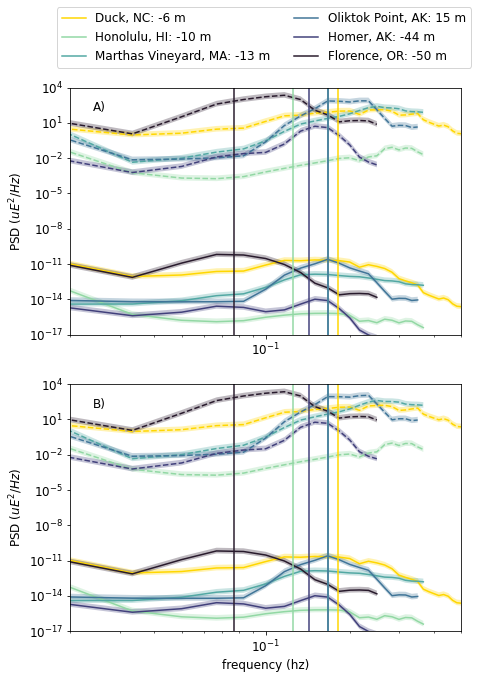

In [48]:
plt.rcParams['lines.linewidth'] = 1.5
plt.rc('font', size=12)


fig,ax = plt.subplots(2,1,figsize=(7,10))

jj = 0 # error ranges
ax[jj].plot(frq_duck_d,psd_duck_d,c = 'gold',linestyle='--')
ax[jj].plot(frq_kno_d,psd_kno_d,c = clrs[1,:],linestyle='--')
ax[jj].plot(frq_mv_d,psd_mv_d,c = clrs[2,:],linestyle='--')
ax[jj].plot(frq_oli_d,psd_oli_d,c = clrs[3,:],linestyle='--')
ax[jj].plot(frq_hom_d,psd_hom_d,c = clrs[4,:],linestyle='--')
ax[jj].plot(frq_flo_d,psd_flo_d,c = clrs[5,:],linestyle='--')
ax[jj].fill_between(frq_duck,psd_duck_d*per95[0], psd_duck_d*per95[1],alpha=0.3, facecolor='gold')
ax[jj].fill_between(frq_kno,psd_kno_d*per95[0], psd_kno_d*per95[1],alpha=0.3, facecolor=clrs[1,:])
ax[jj].fill_between(frq_mv,psd_mv_d*per95[0], psd_mv_d*per95[1],alpha=0.3, facecolor=clrs[2,:])
ax[jj].fill_between(frq_oli,psd_oli_d*per95[0], psd_oli_d*per95[1],alpha=0.3, facecolor=clrs[3,:])
ax[jj].fill_between(frq_hom,psd_hom_d*per95[0], psd_hom_d*per95[1],alpha=0.3, facecolor=clrs[4,:])
ax[jj].fill_between(frq_flo,psd_flo_d*per95[0], psd_flo_d*per95[1],alpha=0.3, facecolor=clrs[5,:])

jj = 1 # depth and pulse correction
ax[jj].plot(frq_duck,psd_duck,c = 'gold',linestyle='--')
ax[jj].plot(frq_kno,psd_kno,c = clrs[1,:],linestyle='--')
ax[jj].plot(frq_mv,psd_mv,c = clrs[2,:],linestyle='--')
ax[jj].plot(frq_oli,psd_oli,c = clrs[3,:],linestyle='--')
ax[jj].plot(frq_hom,psd_hom,c = clrs[4,:],linestyle='--')
ax[jj].plot(frq_flo,psd_flo,c = clrs[5,:],linestyle='--')
ax[jj].fill_between(frq_duck,psd_duck*per95[0], psd_duck*per95[1],alpha=0.3, facecolor='gold')
ax[jj].fill_between(frq_kno,psd_kno*per95[0], psd_kno*per95[1],alpha=0.3, facecolor=clrs[1,:])
ax[jj].fill_between(frq_mv,psd_mv*per95[0], psd_mv*per95[1],alpha=0.3, facecolor=clrs[2,:])
ax[jj].fill_between(frq_oli,psd_oli*per95[0], psd_oli*per95[1],alpha=0.3, facecolor=clrs[3,:])
ax[jj].fill_between(frq_hom,psd_hom*per95[0], psd_hom*per95[1],alpha=0.3, facecolor=clrs[4,:])
ax[jj].fill_between(frq_flo,psd_flo*per95[0], psd_flo*per95[1],alpha=0.3, facecolor=clrs[5,:])

tp_yval = [10e-18,10e3]
for jj in range(2):
    ax[jj].plot(frq_duck,psd_duck_raw,label='Duck, NC: '+ str(h[0])+' m',c = 'gold')
    ax[jj].plot(frq_kno,psd_kno_raw,label='Honolulu, HI: '+ str(h[1])+' m',c = clrs[1,:])
    ax[jj].plot(frq_mv,psd_mv_raw,label='Marthas Vineyard, MA: '+ str(h[2])+' m',c = clrs[2,:])
    ax[jj].plot(frq_oli,psd_oli_raw,label='Oliktok Point, AK: '+ str(h[3])+' m',c = clrs[3,:])
    ax[jj].plot(frq_hom,psd_hom_raw,label='Homer, AK: '+ str(h[4])+' m',c = clrs[4,:])
    ax[jj].plot(frq_flo,psd_flo_raw,label='Florence, OR: '+ str(h[5])+' m',c = clrs[5,:])

    ax[jj].fill_between(frq_duck,psd_duck_raw*per95[0], psd_duck_raw*per95[1],alpha=0.3, facecolor='gold')
    ax[jj].fill_between(frq_kno,psd_kno_raw*per95[0], psd_kno_raw*per95[1],alpha=0.3, facecolor=clrs[1,:])
    ax[jj].fill_between(frq_mv,psd_mv_raw*per95[0], psd_mv_raw*per95[1],alpha=0.3, facecolor=clrs[2,:])
    ax[jj].fill_between(frq_oli,psd_oli_raw*per95[0], psd_oli_raw*per95[1],alpha=0.3, facecolor=clrs[3,:])
    ax[jj].fill_between(frq_hom,psd_hom_raw*per95[0], psd_hom_raw*per95[1],alpha=0.3, facecolor=clrs[4,:])
    ax[jj].fill_between(frq_flo,psd_flo_raw*per95[0], psd_flo_raw*per95[1],alpha=0.3, facecolor=clrs[5,:])
    
    
    ax[jj].plot((1/5.5,1/5.5),tp_yval,c = 'gold') #np.nanmax(psd_duck_raw[frq_duck>0.05])
    ax[jj].plot((1/8,1/8),tp_yval,c = clrs[1,:])
    ax[jj].plot((1/6,1/6),tp_yval,c = clrs[2,:])
    ax[jj].plot((1/6,1/6),tp_yval,c = clrs[3,:])
    ax[jj].plot((1/7,1/7),tp_yval,c = clrs[4,:])
    ax[jj].plot((1/13,1/13),tp_yval,c = clrs[5,:])

    ax[jj].set_xscale('log')
    ax[jj].set_yscale('log')
    
    ax[jj].set_xlim([0.02,0.5])
    ax[jj].set_ylim(tp_yval)
    ax[jj].set_ylabel('PSD ($uE^2/Hz$)')
    
ax[0].legend(ncol=2,loc='upper left',bbox_to_anchor=(-0.05,1.35))
ax[1].set_xlabel('frequency (hz)')
ax[0].text(0.024,100 ,'A)')
ax[1].text(0.024,100,'B)')

# plt.show()
plt.savefig('/Users/hglover/Downloads/strainH1T6_depthcorr.png')

Text(0.024, -150, 'B)')

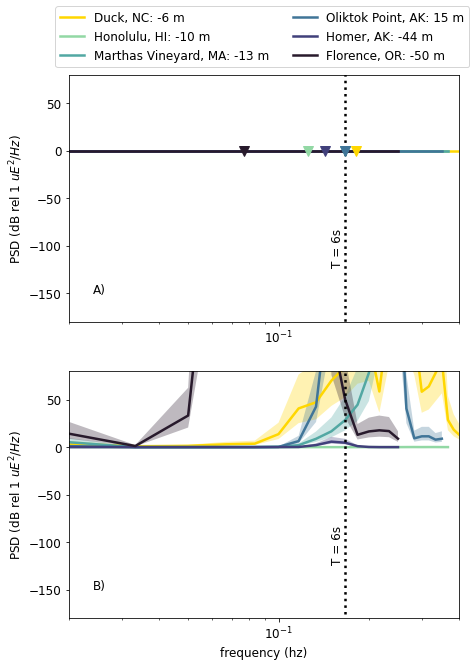

In [8]:
plt.rcParams['lines.linewidth'] = 2.5
plt.rc('font', size=12)

fig,ax = plt.subplots(2,1,figsize=(7,10))
ax[0].plot(frq_duck,psd_duck_raw,label='Duck, NC: '+ str(h[0])+' m',c = 'gold')
ax[0].plot(frq_kno,psd_kno_raw,label='Honolulu, HI: '+ str(h[1])+' m',c = clrs[1,:])
ax[0].plot(frq_mv,psd_mv_raw,label='Marthas Vineyard, MA: '+ str(h[2])+' m',c = clrs[2,:])
ax[0].plot(frq_oli,psd_oli_raw,label='Oliktok Point, AK: '+ str(h[3])+' m',c = clrs[3,:])
ax[0].plot(frq_hom,psd_hom_raw,label='Homer, AK: '+ str(h[4])+' m',c = clrs[4,:])
ax[0].plot(frq_flo,psd_flo_raw,label='Florence, OR: '+ str(h[5])+' m',c = clrs[5,:])

ax[0].fill_between(frq_duck,psd_duck_raw*per95[0], psd_duck_raw*per95[1],alpha=0.3, facecolor='gold')
ax[0].fill_between(frq_kno,psd_kno_raw*per95[0], psd_kno_raw*per95[1],alpha=0.3, facecolor=clrs[1,:])
ax[0].fill_between(frq_mv,psd_mv_raw*per95[0], psd_mv_raw*per95[1],alpha=0.3, facecolor=clrs[2,:])
ax[0].fill_between(frq_oli,psd_oli_raw*per95[0], psd_oli_raw*per95[1],alpha=0.3, facecolor=clrs[3,:])
ax[0].fill_between(frq_hom,psd_hom_raw*per95[0], psd_hom_raw*per95[1],alpha=0.3, facecolor=clrs[4,:])
ax[0].fill_between(frq_flo,psd_flo_raw*per95[0], psd_flo_raw*per95[1],alpha=0.3, facecolor=clrs[5,:])
ax[0].plot((1/6,1/6),(-500,500),'k:')

ax[0].plot(1/5.5,np.nanmax(psd_duck_raw[frq_duck>0.05]),c = 'gold',marker='v', markersize=10)
ax[0].plot(1/8,np.nanmax(psd_kno_raw[frq_kno>0.05]),c = clrs[1,:],marker='v', markersize=10)
ax[0].plot(1/6,np.nanmax(psd_mv_raw[frq_mv>0.05]),c = clrs[2,:],marker='v', markersize=10)
ax[0].plot(1/6,np.nanmax(psd_oli_raw[frq_oli>0.05]),c = clrs[3,:],marker='v', markersize=10)
ax[0].plot(1/7,np.nanmax(psd_hom_raw[frq_hom>0.05]),c = clrs[4,:],marker='v', markersize=10)
ax[0].plot(1/13,np.nanmax(psd_flo_raw[frq_flo>0.05]),c = clrs[5,:],marker='v', markersize=10)
# Duck is 5.5 s
# period from pressure is 8s
# MVCO ?
# Oliktok: period is 6 s
# Homer: 7.4 s
# Florence: 13 s

ax[1].plot(frq_duck,psd_duck,c = 'gold')
ax[1].plot(frq_kno,psd_kno,c = clrs[1,:])
ax[1].plot(frq_mv,psd_mv,c = clrs[2,:])
ax[1].plot(frq_oli,psd_oli,c = clrs[3,:])
ax[1].plot(frq_hom,psd_hom,c = clrs[4,:])
ax[1].plot(frq_flo,psd_flo,c = clrs[5,:])

ax[1].fill_between(frq_duck,psd_duck*per95[0], psd_duck*per95[1],alpha=0.3, facecolor='gold')
ax[1].fill_between(frq_kno,psd_kno*per95[0], psd_kno*per95[1],alpha=0.3, facecolor=clrs[1,:])
ax[1].fill_between(frq_mv,psd_mv*per95[0], psd_mv*per95[1],alpha=0.3, facecolor=clrs[2,:])
ax[1].fill_between(frq_oli,psd_oli*per95[0], psd_oli*per95[1],alpha=0.3, facecolor=clrs[3,:])
ax[1].fill_between(frq_hom,psd_hom*per95[0], psd_hom*per95[1],alpha=0.3, facecolor=clrs[4,:])
ax[1].fill_between(frq_flo,psd_flo*per95[0], psd_flo*per95[1],alpha=0.3, facecolor=clrs[5,:])
ax[1].plot((1/6,1/6),(-500,500),'k:')


ax[0].legend(ncol=2,loc='upper left',bbox_to_anchor=(-0.05,1.3))#,bbox_to_anchor=(0.5,0.5)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_xlim([0.02,0.4])
ax[1].set_xlim([0.02,0.4])
ax[1].set_xlabel('frequency (hz)')
ax[0].set_ylabel('PSD (dB rel 1 $uE^2/Hz$)')
ax[1].set_ylabel('PSD (dB rel 1 $uE^2/Hz$)')
ax[0].set_ylim([-180,80])
ax[1].set_ylim([-180,80])
ax[0].text(0.15,-120 ,'T = 6s',rotation='vertical')
ax[1].text(0.15,-120 ,'T = 6s',rotation='vertical')
ax[0].text(0.024,-150 ,'A)')
ax[1].text(0.024,-150 ,'B)')
# plt.show()
# plt.savefig('/Users/hglover/Downloads/strainH1T6_depthcorr.png')